In [ ]:
!git clone https://github.com/PacktPublishing/Artificial-Intelligence-with-Python.git

"git" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


In [2]:
!pip install deap

     ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
     - -------------------------------------- 0.0/1.1 MB 660.6 kB/s eta 0:00:02
     ---- ----------------------------------- 0.1/1.1 MB 1.4 MB/s eta 0:00:01
     --------------------- ------------------ 0.6/1.1 MB 4.4 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 6.1 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for deap: filename=deap-1.4.1-py3-none-any.whl size=97349 sha256=11f4a7f32f7b24951ff47fcb06aa10f5133104211df32f048487ce580870edf8
  Stored in directory: c:\users\klok1\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local\pip\cache\wheels\f8\64\b8\65eacfbff3024ae2e2beb22e691d5c8abb89fbd863b8049b5f
Successfully built deap


# Часть 1 --- Генерация битовых образов с предопределенными параметрами

In [3]:
import random
import numpy as np
from deap import base, creator, tools

# Evaluation function
def eval_func(individual):
    target_sum = 6 #45
    return len(individual) - abs(sum(individual) - target_sum),

# Create the toolbox with the right parameters
def create_toolbox(num_bits):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # Initialize the toolbox
    toolbox = base.Toolbox()

    # Generate attributes
    toolbox.register("attr_bool", random.randint, 0, 1)

    # Initialize structures
    toolbox.register("individual", tools.initRepeat, creator.Individual,
        toolbox.attr_bool, num_bits)

    # Define the population to be a list of individuals
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Register the evaluation operator
    toolbox.register("evaluate", eval_func)

    # Register the crossover operator
    toolbox.register("mate", tools.cxTwoPoint)

    # Register a mutation operator
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05) # мутация 5%

    # Operator for selecting individuals for breeding
    toolbox.register("select", tools.selTournament, tournsize=3)

    return toolbox

if __name__ == "__main__":
    # Define the number of bits
    num_bits = 75

    # Create a toolbox using the above parameter
    toolbox = create_toolbox(num_bits)

    # Seed the random number generator
    random.seed(7)

    # Create an initial population of 500 individuals
    population = toolbox.population(n=15)

    # Define probabilities of crossing and mutating
    probab_crossing, probab_mutating  = 0.5, 0.2

    # Define the number of generations
    num_generations = 60 #60

    print('\nStarting the evolution process')

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fit in zip(population, fitnesses):
        ind.fitness.values = fit

    print('\nEvaluated', len(population), 'individuals')

    # Iterate through generations
    for g in range(num_generations):
        print("\n===== Generation", g)

        # Select the next generation individuals
        offspring = toolbox.select(population, len(population))

        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))

        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            # Cross two individuals
            if np.random.f(1, 1, 1) < probab_crossing: # изначально был random.random()
                toolbox.mate(child1, child2)

                # "Forget" the fitness values of the children
                del child1.fitness.values
                del child2.fitness.values

        # Apply mutation
        for mutant in offspring:
            # Mutate an individual
            if np.random.f(1, 1, 1) < probab_mutating: # изначально был random.random()
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        print('Evaluated', len(invalid_ind), 'individuals')

        # The population is entirely replaced by the offspring
        population[:] = offspring

        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in population]

        length = len(population)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5

        print('Min =', min(fits), ', Max =', max(fits))
        print('Average =', round(mean, 2), ', Standard deviation =',
                round(std, 2))

    print("\n==== End of evolution")

    best_ind = tools.selBest(population, 1)[0]
    print('\nBest individual:\n', best_ind)
    print('\nNumber of ones:', sum(best_ind))


Starting the evolution process

Evaluated 15 individuals

===== Generation 0
Evaluated 6 individuals
Min = 42.0 , Max = 52.0
Average = 47.33 , Standard deviation = 2.75

===== Generation 1
Evaluated 9 individuals
Min = 46.0 , Max = 52.0
Average = 49.87 , Standard deviation = 1.78

===== Generation 2
Evaluated 6 individuals
Min = 46.0 , Max = 53.0
Average = 50.8 , Standard deviation = 1.56

===== Generation 3
Evaluated 6 individuals
Min = 46.0 , Max = 54.0
Average = 51.13 , Standard deviation = 2.19

===== Generation 4
Evaluated 7 individuals
Min = 49.0 , Max = 55.0
Average = 52.73 , Standard deviation = 1.44

===== Generation 5
Evaluated 8 individuals
Min = 52.0 , Max = 56.0
Average = 54.0 , Standard deviation = 1.37

===== Generation 6
Evaluated 9 individuals
Min = 53.0 , Max = 56.0
Average = 54.73 , Standard deviation = 1.0

===== Generation 7
Evaluated 12 individuals
Min = 53.0 , Max = 57.0
Average = 55.0 , Standard deviation = 1.21

===== Generation 8
Evaluated 6 individuals
Min =

Когда усложнили цель, пришлось увеличить число поколений

In [4]:
# про кроссовер https://deap.readthedocs.io/en/master/_modules/deap/tools/crossover.html
# рандомы (в нашем случае использовали np.random.f(1, 1, 1)) https://numpy.org/doc/stable/reference/random/generated/numpy.random.f.html

# Часть 2 --- Визуализация хода эволюции

C:\Users\klok1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	evals	std   	min    	avg    	max    
0  	200  	188.36	217.082	576.281	1199.71
1  	200  	267.771	177.951	664.621	1886.26
2  	200  	278.323	241.077	697.146	1801.67
3  	200  	218.546	137.702	513.883	1307.41
4  	200  	131.992	140.886	374.041	739.372
5  	200  	84.5236	113.862	291.389	625.977
6  	200  	66.4526	126.375	243.34 	469.926
7  	200  	49.7153	82.8412	197.511	348.043
8  	200  	38.3504	73.0274	167.743	309.409
9  	200  	37.4221	76.7296	162.881	337.876
10 	200  	31.584 	90.0571	151.457	250.642
11 	200  	28.7502	60.9416	137.673	255.886
12 	200  	30.5608	58.3516	136.254	242.471
13 	200  	28.2293	61.0749	132.133	200.212
14 	200  	24.8966	73.6083	128.44 	201.353
15 	200  	24.0441	44.6969	121.76 	184.873
16 	200  	23.8312	66.5502	117.786	183.772
17 	200  	22.3703	49.7996	118.032	173.369
18 	200  	21.2466	50.2553	111.336	164.842
19 	200  	23.693 	29.7588	110.346	167.159
20 	200  	23.1049	37.4303	108.531	166.706
21 	200  	23.6721	52.7345	112.505	158.215
22 	200  	21.6273	46.0387	108.519	15

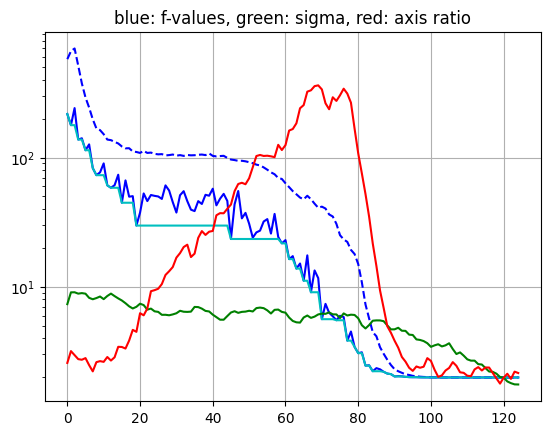

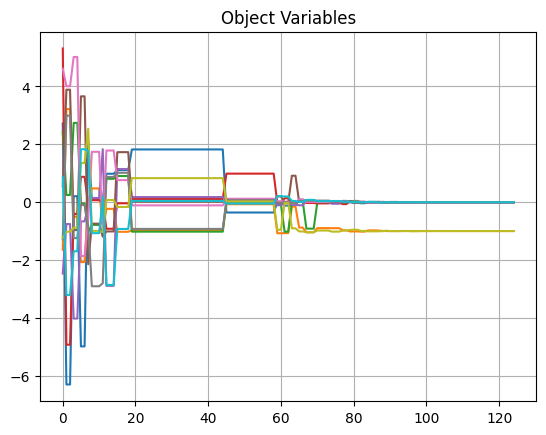

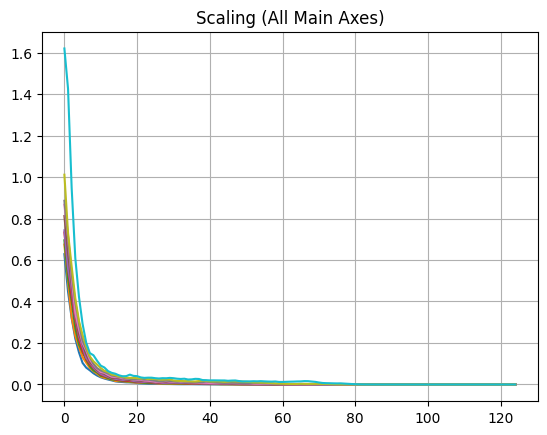

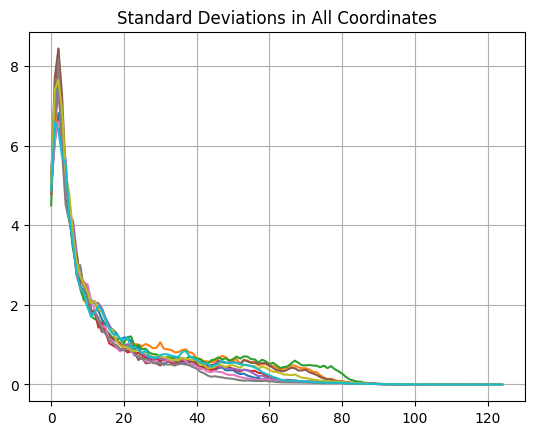

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, \
        cma, creator, tools

# Function to create a toolbox
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rastrigin)

    # Seeed the random number generator
    np.random.seed(7)

    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    return toolbox

if __name__ == "__main__":
    # Problem size
    num_individuals = 10
    num_generations = 125

    # Create a strategy using CMA-ES algorithm
    strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=5.0,
            lambda_=20*num_individuals)

    # Create toolbox based on the above strategy
    toolbox = create_toolbox(strategy)

    # Create hall of fame object
    hall_of_fame = tools.HallOfFame(1)

    # Register the relevant stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"

    # Objects that will compile the data
    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations, 1))
    diagD = np.ndarray((num_generations, num_individuals))
    fbest = np.ndarray((num_generations,1))
    best = np.ndarray((num_generations, num_individuals))
    std = np.ndarray((num_generations, num_individuals))

    for gen in range(num_generations):
        # Generate a new population
        population = toolbox.generate()

        # Evaluate the individuals
        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        # Update the strategy with the evaluated individuals
        toolbox.update(population)

        # Update the hall of fame and the statistics with the
        # currently evaluated population
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)

        print(logbook.stream)

        # Save more data along the evolution
        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)

    # The x-axis will be the number of evaluations
    x = list(range(0, num_generations))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, min_, "-b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")

    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variables")

    plt.figure()
    plt.plot(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.plot(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")

    plt.show()

In [6]:
print(diagD)

[[6.28151297e-01 6.74395615e-01 6.95084119e-01 ... 8.85481573e-01
  1.01113319e+00 1.61949685e+00]
 [4.48001030e-01 4.93713873e-01 5.11564637e-01 ... 7.15651409e-01
  7.30657239e-01 1.42597680e+00]
 [3.19433964e-01 3.24208373e-01 4.00059474e-01 ... 5.33376188e-01
  5.67884085e-01 9.46537479e-01]
 ...
 [2.06331891e-10 2.21108607e-10 2.32688353e-10 ... 3.62693216e-10
  3.64557713e-10 4.00568602e-10]
 [1.52066925e-10 1.63187507e-10 1.78136198e-10 ... 2.68257640e-10
  2.76783298e-10 3.35749581e-10]
 [1.12829618e-10 1.25883209e-10 1.28483881e-10 ... 1.89325286e-10
  2.09760668e-10 2.43106625e-10]]


In [7]:
print(std)

[[4.88925610e+00 4.87699537e+00 4.50033477e+00 ... 4.82288970e+00
  5.04696985e+00 4.89104599e+00]
 [6.09132582e+00 6.27623450e+00 6.90848823e+00 ... 6.55333762e+00
  7.40741816e+00 6.59833396e+00]
 [6.81646012e+00 7.47574728e+00 7.49730589e+00 ... 8.17337237e+00
  7.65629412e+00 6.38617210e+00]
 ...
 [3.92728686e-05 4.05917010e-05 3.51765107e-05 ... 3.72635579e-05
  3.69932146e-05 3.63116554e-05]
 [3.40973476e-05 3.36994194e-05 3.25256686e-05 ... 2.92274219e-05
  3.00467837e-05 2.90440560e-05]
 [2.98711502e-05 2.59781175e-05 2.73874065e-05 ... 2.59187284e-05
  2.49374160e-05 2.41407155e-05]]


In [8]:
hall_of_fame[0]

[6.126167519514831e-06,
 -0.9949764600542476,
 6.608585409731133e-06,
 -1.6604570195666035e-05,
 6.518172470953918e-06,
 1.0081017687211471e-05,
 -9.402054932323824e-06,
 6.4194955256563555e-06,
 -0.9949514760853542,
 -9.461883754128175e-06]

gen	evals	std        	min   	avg       	max        
0  	200  	4.28523e+07	768969	3.7057e+07	3.28157e+08
1  	200  	3.17756e+07	1.10483e+06	3.54977e+07	2.09927e+08
2  	200  	2.22351e+07	305200     	2.12877e+07	1.24071e+08
3  	200  	2.19677e+07	105864     	1.67012e+07	1.91392e+08
4  	200  	6.65194e+06	123068     	6.47885e+06	4.83766e+07
5  	200  	3.45629e+06	65444.7    	3.06514e+06	2.66926e+07
6  	200  	1.54374e+06	67928.2    	1.54961e+06	1.08843e+07
7  	200  	778266     	24626.6    	778155     	7.50812e+06
8  	200  	435697     	10005.4    	390893     	4.30603e+06
9  	200  	177954     	14706.1    	189944     	1.35272e+06
10 	200  	108290     	10280.2    	114253     	702887     
11 	200  	158691     	4414.81    	103709     	1.82477e+06
12 	200  	107874     	3299.57    	72349.9    	986593     
13 	200  	48352.7    	1006.42    	38132.6    	387827     
14 	200  	32852.6    	1555.6     	30760.3    	232272     
15 	200  	23050.3    	599.569    	19421      	237268     
16 	200  	12865.2    	547.

C:\Users\klok1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


59 	200  	1.41052    	5.96538    	7.37235    	20.8031    
60 	200  	1.26219    	5.93256    	7.335      	16.1113    
61 	200  	1.0701     	5.74663    	6.99111    	16.2411    
62 	200  	1.2984     	5.50501    	7.12113    	18.4501    
63 	200  	0.773569   	5.31845    	6.74217    	10.3287    
64 	200  	0.723988   	5.39318    	6.60538    	10.4305    
65 	200  	0.783719   	5.28036    	6.50043    	11.5421    
66 	200  	0.632191   	5.20036    	6.21427    	9.5935     
67 	200  	0.864421   	5.20458    	6.2562     	13.0506    
68 	200  	0.762971   	5.13405    	6.03965    	11.5339    
69 	200  	0.614496   	5.04576    	5.94277    	9.88216    
70 	200  	0.977957   	4.88657    	5.99977    	12.6669    
71 	200  	0.714092   	4.66862    	5.73653    	10.6861    
72 	200  	0.595346   	4.41499    	5.64169    	8.16859    
73 	200  	0.784149   	4.27796    	5.70597    	11.1228    
74 	200  	1.2646     	4.41527    	5.87863    	18.0218    
75 	200  	0.744212   	4.06122    	5.57987    	8.52006    
76 	200  	1.51

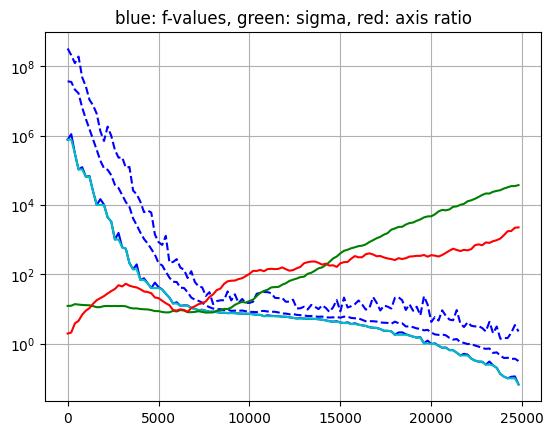

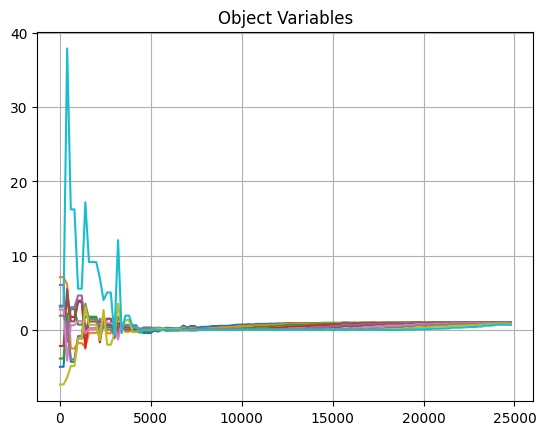

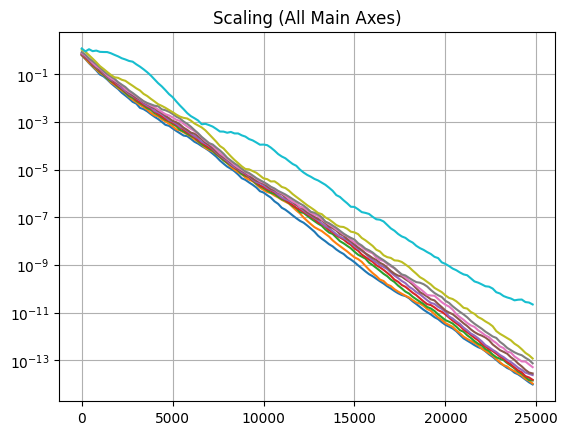

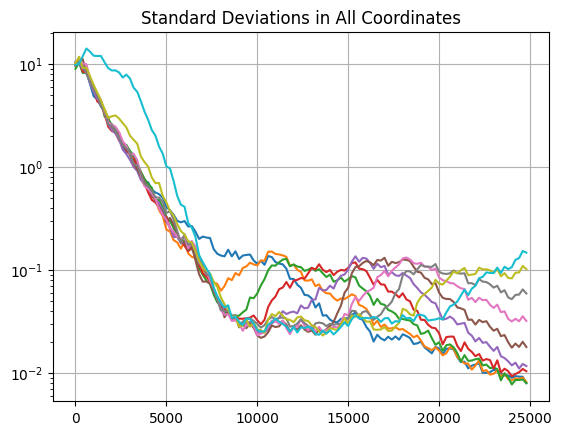

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, \
        cma, creator, tools

# Function to create a toolbox
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rosenbrock)

    # Seeed the random number generator
    np.random.seed(7)

    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    return toolbox

if __name__ == "__main__":
    # Problem size
    num_individuals = 10
    num_generations = 125

    # Create a strategy using CMA-ES algorithm
    strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=10.0,
            lambda_=20*num_individuals)

    # Create toolbox based on the above strategy
    toolbox = create_toolbox(strategy)

    # Create hall of fame object
    hall_of_fame = tools.HallOfFame(1)

    # Register the relevant stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"

    # Objects that will compile the data
    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations, 1))
    diagD = np.ndarray((num_generations, num_individuals))
    fbest = np.ndarray((num_generations,1))
    best = np.ndarray((num_generations, num_individuals))
    std = np.ndarray((num_generations, num_individuals))

    for gen in range(num_generations):
        # Generate a new population
        population = toolbox.generate()

        # Evaluate the individuals
        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit

        # Update the strategy with the evaluated individuals
        toolbox.update(population)

        # Update the hall of fame and the statistics with the
        # currently evaluated population
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)

        print(logbook.stream)

        # Save more data along the evolution
        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)

    # The x-axis will be the number of evaluations
    x = list(range(0, strategy.lambda_ * num_generations, strategy.lambda_))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, max_, "--b")
    plt.semilogy(x, min_, "-b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")

    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variables")

    plt.figure()
    plt.semilogy(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.semilogy(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")

    plt.show()

In [10]:
print(best.T[0]) #это x1

[-4.96964701 -4.96964701  2.06586605 -4.29791612 -4.29791612 -1.16963642
 -1.16963642 -0.64391357  1.62294763  1.62294763  1.62294763  0.28865993
  0.67124268  0.64821892  0.64821892 -0.85382768  0.89647381  0.81266866
  0.02930179  0.02930179  0.60698203  0.60698203 -0.14745302 -0.42931874
 -0.42931874 -0.42931874  0.00531627 -0.24312752  0.01532527  0.27706674
  0.27706674  0.23435799  0.23435799  0.23435799  0.5892404   0.31455675
  0.5186124   0.5186124   0.28328531  0.40888991  0.40888991  0.42898698
  0.51663901  0.51663901  0.54779531  0.54779531  0.54779531  0.58952661
  0.66640339  0.69148744  0.71485258  0.71614508  0.76394739  0.72614256
  0.80536425  0.80536425  0.80536425  0.80536425  0.84880924  0.83459911
  0.87634898  0.85939714  0.90519041  0.91859078  0.91859078  0.90107595
  0.91215986  0.91215986  0.90308988  0.9107286   0.92223617  0.91465966
  0.94478846  0.9612268   0.9612268   0.94988664  0.95208679  0.95208679
  0.98818003  0.98818003  0.97377315  0.97281579  0

# Часть 3 --- Решение задачи символической регрессии

In [27]:
import operator
import math
import random

import numpy as np
from deap import algorithms, base, creator, tools, gp

# Define new functions
def division_operator(numerator, denominator):
    if denominator == 0:
        return 1

    return numerator / denominator

# Define the evaluation function
def eval_func(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)

    # Evaluate the mean squared error
    mse = ((func(x) - (x**3 / 3 + math.sin(x**2)))**2 for x in points)

    return math.fsum(mse) / len(points),

# Function to create the toolbox
def create_toolbox():
    pset = gp.PrimitiveSet("MAIN", 1)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)

    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))

    pset.renameArguments(ARG0='x')

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points=[x/10. for x in range(-50,50)])
    #toolbox.register("evaluate", eval_func, points=[x/10. for x in range(-10,10)])
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    return toolbox

if __name__ == "__main__":
    random.seed(10)

    toolbox = create_toolbox()

    population = toolbox.population(n=450)
    hall_of_fame = tools.HallOfFame(1)

    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)

    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.4
    probab_mutate = 0.2
    num_generations = 150

    population, log = algorithms.eaSimple(population, toolbox,
            probab_crossover, probab_mutate, num_generations,
            stats=mstats, halloffame=hall_of_fame, verbose=True)

C:\Users\klok1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\gp.py:254: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "
C:\Users\klok1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\klok1\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritte

   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max   	min    	nevals	std    	avg    	gen	max	min	nevals	std    
0  	450   	260.748	0  	2791.3	115.466	450   	136.622	3.57556	0  	7  	2  	450   	1.49215
1  	259   	981.543	1  	333300	115.466	259   	15683.8	4.02   	1  	12 	1  	259   	1.81893
2  	244   	205.158	2  	449.074	115.466	244   	57.2093	4.30222	2  	13 	1  	244   	2.1535 
3  	231   	179.325	3  	649.036	29.7223	231   	61.3978	4.48222	3  	16 	1  	231   	2.34869
4  	249   	152.337	4  	395.632	7.62213	249   	51.6035	4.46222	4  	13 	1  	249   	2.33707
5  	254   	150.935	5  	6208.98	29.7223	254   	291.36 	4.45111	5  	13 	1  	254   	2.27617
6  	236   	116.568	6  	379.343	29.7223	236   	50.4524	4.46   	6  	13 	1  	236   	2.0644 
7  	230   	111.636	7  	3647.45	29.7223	230   	175.164	5.2    	7  	14 	1  	230

In [22]:
hall_of_fame[0]

In [23]:
gp.graph(hall_of_fame[0])

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [(0, 1),
  (0, 2),
  (2, 3),
  (3, 4),
  (4, 5),
  (5, 6),
  (6, 7),
  (5, 8),
  (8, 9),
  (9, 10),
  (10, 11),
  (9, 12),
  (12, 13),
  (12, 14),
  (8, 15),
  (4, 16),
  (16, 17),
  (17, 18),
  (18, 19),
  (18, 20),
  (20, 21),
  (21, 22),
  (21, 23),
  (17, 24),
  (24, 25),
  (25, 26),
  (26, 27),
  (26, 28),
  (25, 29),
  (29, 30),
  (29, 31),
  (2, 32),
  (32, 33),
  (33, 34),
  (32, 35),
  (35, 36),
  (35, 37)],
 {0: 'add',
  1: 'x',
  2: 'sub',
  3: 'neg',
  4: 'sub',
  5: 'mul',
  6: 'neg',
  7: -1,
  8: 'division_operator',
  9: 'mul',
  10: 'neg',
  11: 'x',
  12: 'mul',
  13: 'x',
  14: 'x',
  15: 0,
  16: 'neg',
  17: 'sub',
  18: 'sub',
  19: 'x',
  20: 'sin',
  21: 'mul',
  22: 'x',
  23: 'x',
  24: 'neg',
  25: 'sub',
  26: 'add',
  27: 0,
  28: 'x',
  29:

Количество ребер:  62
Количество вершин:  63


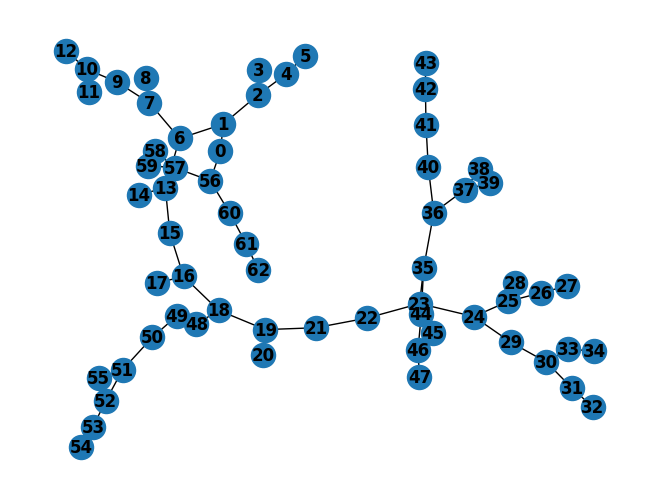

In [28]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(hall_of_fame):
  nodes, edges, labels = gp.graph(hall_of_fame)
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  print("Количество ребер: ", len(edges))
  print("Количество вершин: ", len(nodes))

# рисуем граф и отображаем его
  nx.draw(g, with_labels=True, font_weight='bold')
  plt.show()

draw_graph(hall_of_fame[0])

In [25]:
best_individual = hall_of_fame[0]
best_func = toolbox.compile(best_individual)
print(best_individual)

add(x, sub(neg(sub(mul(neg(-1), division_operator(mul(neg(x), mul(x, x)), 0)), neg(sub(sub(x, sin(mul(x, x))), neg(sub(add(0, x), sub(x, -1))))))), mul(neg(x), mul(x, x))))


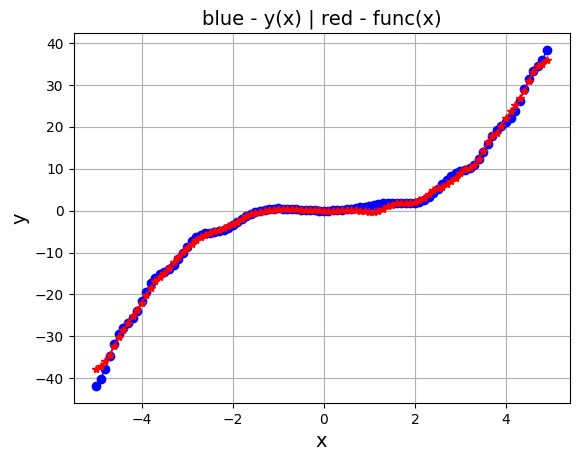

In [29]:
import numpy as np
import pandas as pd

best_individual = hall_of_fame[0]

best_function = toolbox.compile(best_individual)

def yi(x):
  return x**3 / 3 + math.sin(x**2)

data = {'x': [], 'y':[]}


for i in list(np.arange(-5.0, 5.0, 0.1)):
  x = round(i,2)
  y = yi(x)
  data['x'].append(x)
  data['y'].append(yi(x))

points = {'x': [], 'y': []}


for i in list(np.arange(-5.0, 5.0, 0.1)):
  x1 = round(i,2)
  y1 = best_function(x1)
  points['x'].append(x1)
  points['y'].append(y1)

df1 = pd.DataFrame(data)
df = pd.DataFrame(points)

plt.plot(df1['x'], df1['y'], color='blue', marker='o', linewidth='1')
plt.plot(df['x'], df['y'], color='red', marker='*', linewidth='1')
plt.title('blue - y(x) | red - func(x)', fontsize=14)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.grid(True)
plt.show()

## функция от двух переменных

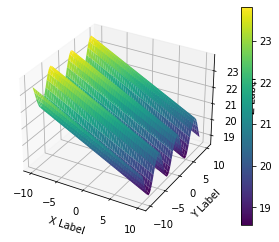

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Задаем функцию, которую хотим построить
def f(x, y):
    return (13.2 - (x / 6)) + (8 + np.sin(y))

# Создаем данные для осей x и y
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)

# Создаем сетку точек
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Создаем трехмерный график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Строим поверхность
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Добавляем подписи к осям
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Добавляем цветовую шкалу
fig.colorbar(surf)

# Показываем график
plt.show()

Количество ребер:  408
Количество вершин:  409


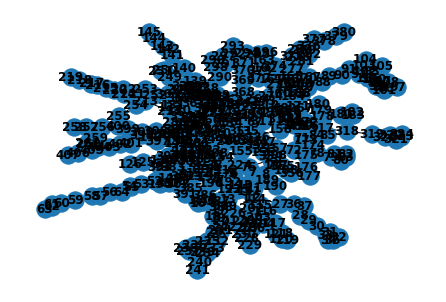

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(hall_of_fame):
  nodes, edges, labels = gp.graph(hall_of_fame)
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  print("Количество ребер: ", len(edges))
  print("Количество вершин: ", len(nodes))

# рисуем граф и отображаем его
  nx.draw(g, with_labels=True, font_weight='bold')
  plt.show()

draw_graph(hall_of_fame[0])

In [ ]:
best_individual = hall_of_fame[0]
best_func = toolbox.compile(best_individual)
print(best_individual)

sub(add(add(add(add(x, mul(cos(x), sub(add(x, add(add(sub(1, 1), add(x, neg(sin(add(cos(1), add(x, 0)))))), sub(add(x, mul(cos(x), sub(x, -1))), sin(x)))), add(neg(x), cos(cos(sub(add(x, neg(sin(-1))), mul(x, 0)))))))), add(cos(1), add(add(x, neg(sin(mul(x, cos(1))))), 0))), sub(add(add(add(neg(sin(mul(add(add(x, neg(sin(x))), mul(cos(x), sub(x, -1))), cos(1)))), add(x, add(x, add(x, sub(sub(sub(sub(add(x, neg(sin(x))), x), sin(sin(x))), x), sin(sin(x))))))), cos(x)), add(neg(sin(add(x, neg(sin(mul(x, cos(-1))))))), add(x, neg(sin(x))))), division_operator(sub(add(division_operator(x, x), add(neg(sin(x)), add(x, neg(sin(add(x, cos(cos(x)))))))), sin(x)), -1))), sin(x)), sub(sin(x), sub(add(add(add(neg(sin(add(neg(sin(x)), add(x, add(x, add(sin(x), sub(sub(add(x, neg(sin(x))), add(cos(x), division_operator(-1, x))), sin(sin(x))))))))), add(x, add(x, add(add(x, mul(cos(x), sub(add(x, x), -1))), add(cos(1), add(x, 0)))))), x), add(add(neg(sin(mul(add(add(x, neg(sin(x))), 0), cos(1)))), ad

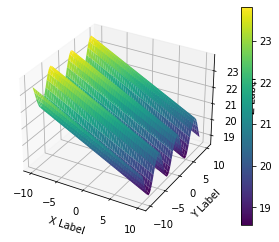

In [ ]:
import numpy as np
import pandas as pd

best_individual = hall_of_fame[0]

best_function = toolbox.compile(best_individual)

def yi(x, y1):
  #return (math.sin(x))**2 + (x - 2) * (-math.exp(x - 3)) + math.cos((x + 1)**2 + 500)    (13.2 - (x / 6)) + (8 + np.sin(y))
  return 13.2 - ((x / 6)) + (8 + np.sin(y))

data = {'x': [], 'y':[]}


for i in list(np.arange(-5.0, 5.0, 0.1)):
  x = round(i,2)
  y = yi(x, y)
  data['x'].append(x)
  data['y'].append(yi(x, y))

points = {'x': [], 'y': []}


for i in list(np.arange(-5.0, 5.0, 0.1)):
  x1 = round(i,2)
  y1 = best_function(x1)
  points['x'].append(x1)
  points['y'].append(y1)

df1 = pd.DataFrame(data)
df = pd.DataFrame(points)

#Создаем данные для осей x и y
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)

# Создаем сетку точек
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Создаем трехмерный график
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Строим поверхность
surf = ax.plot_surface(X, Y, Z, cmap='viridis')

# Добавляем подписи к осям
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# Добавляем цветовую шкалу
fig.colorbar(surf)

# Показываем график
plt.show()

In [ ]:
#(2.2 - (x / 11)) + (7 + math.cos(y))

# Часть 4
Задание 9 || https://www.youtube.com/playlist?list=PLA0M1Bcd0w8zkG8DJSyqrKyBfDtRJ2Ohh

GitHub || https://github.com/selfedu-rus/genetic-algorithms

In [ ]:
from deap import tools
from deap.algorithms import varAnd


def eaSimpleElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__, callback=None):
    """Перелеланный алгоритм eaSimple с элементом элитизма
    """

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

        if callback:
            callback[0](*callback[1])

    return population, logbook


In [30]:
%pip update_display algelitism

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "update_display"



gen	nevals	min     	avg    
0  	200   	0.077887	137.504
1  	178   	0.077887	65.6455
2  	178   	0.077887	33.9244
3  	181   	0.077887	20.7587
4  	183   	0.0392467	20.2488
5  	186   	0.00496546	15.317 
6  	178   	0.00496546	8.57341
7  	174   	0.00331527	13.0142
8  	181   	0.00195266	9.44393
9  	167   	0.00132252	5.62497
10 	187   	0.000601159	5.23628
11 	168   	0.000601159	5.16579
12 	176   	0.000595173	3.73966
13 	187   	0.000584573	0.869731
14 	177   	0.000442491	1.68745 
15 	172   	0.000431091	2.18181 
16 	175   	0.000431091	1.68823 
17 	176   	0.000314617	1.75943 
18 	187   	0.000313926	2.46541 
19 	169   	0.000308357	0.962328
20 	173   	0.000308269	4.29568 
21 	182   	0.000244485	1.6645  
22 	180   	0.000244485	3.1337  
23 	177   	0.000239511	1.29416 
24 	169   	0.00022905 	3.34391 
25 	179   	0.000224357	2.22677 
26 	175   	0.000224155	2.43633 
27 	179   	0.000224155	2.726   
28 	179   	0.000222024	3.01859 
29 	168   	0.000221898	0.784885
30 	180   	0.000221549	2.75776 
31 	174   	0

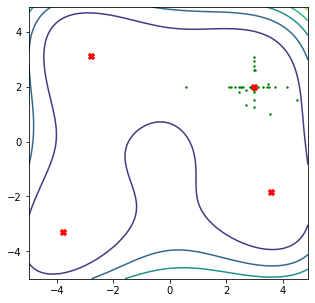

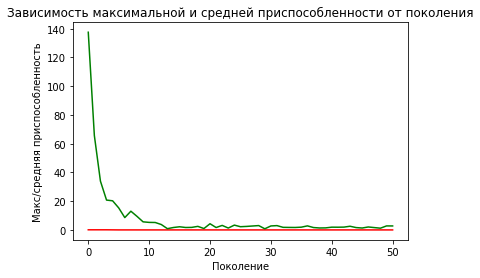

In [ ]:
from deap import base, algorithms
from deap import creator
from deap import tools

import algelitism

import random
import matplotlib.pyplot as plt
import numpy as np

LOW, UP = -5, 5
ETA = 20
LENGTH_CHROM = 2    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 200   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.2        # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений
HALL_OF_FAME_SIZE = 5

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


def randomPoint(a, b):
    return [random.uniform(a, b), random.uniform(a, b)]


toolbox = base.Toolbox()
toolbox.register("randomPoint", randomPoint, LOW, UP)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomPoint)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)


def himmelblau(individual):
    x, y = individual
    f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
    return f,

toolbox.register("evaluate", himmelblau)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=LOW, up=UP, eta=ETA)
toolbox.register("mutate", tools.mutPolynomialBounded, low=LOW, up=UP, eta=ETA, indpb=1.0/LENGTH_CHROM)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)


import time
def show(ax, xgrid, ygrid, f):
    ptMins = [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584458, -1.848126]]

    ax.clear()
    ax.contour(xgrid, ygrid, f)
    ax.scatter(*zip(*ptMins), marker='X', color='red', zorder=1)
    ax.scatter(*zip(*population), color='green', s=2, zorder=0)

    plt.draw()
    plt.gcf().canvas.flush_events()

    time.sleep(0.2)


x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xgrid, ygrid = np.meshgrid(x, y)

f_himmelbalu = (xgrid**2 + ygrid - 11)**2 + (xgrid + ygrid**2 - 7)**2

plt.ion()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

ax.set_xlim(LOW-3, UP+3)
ax.set_ylim(LOW-3, UP+3)

#algelitism.eaSimpleElitism
#algorithms.eaSimple
population, logbook = algelitism.eaSimpleElitism(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        callback=(show, (ax, xgrid, ygrid, f_himmelbalu)),
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.ioff()
plt.show()

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()



# Решётки / робот

In [ ]:
import copy
import random
from functools import partial

import numpy as np
from deap import algorithms, base, creator, tools, gp

class RobotController(object):
    def __init__(self, max_moves):
        self.max_moves = max_moves
        self.moves = 0
        self.consumed = 0
        self.routine = None
        self.moves_done = []

        self.direction = ["north", "east", "south", "west"]
        self.direction_row = [1, 0, -1, 0]
        self.direction_col = [0, 1, 0, -1]

    def _reset(self):
        self.row = self.row_start
        self.col = self.col_start
        self.direction = 1
        self.moves = 0
        self.consumed = 0
        self.matrix_exc = copy.deepcopy(self.matrix)
        self.moves_done = []

    def _conditional(self, condition, out1, out2):
        out1() if condition() else out2()

    def turn_left(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction - 1) % 4
            self.moves_done.append("turn left")

    def turn_right(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction + 1) % 4
            self.moves_done.append("turn right")

    def move_forward(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.row = (self.row + self.direction_row[self.direction]) % self.matrix_row
            self.col = (self.col + self.direction_col[self.direction]) % self.matrix_col

            if self.matrix_exc[self.row][self.col] == "target":
                self.consumed += 1

            self.matrix_exc[self.row][self.col] = "passed"
            self.moves_done.append("move_forward")

    def sense_target(self):
        ahead_row = (self.row + self.direction_row[self.direction]) % self.matrix_row
        ahead_col = (self.col + self.direction_col[self.direction]) % self.matrix_col
        return self.matrix_exc[ahead_row][ahead_col] == "target"

    def if_target_ahead(self, out1, out2):
        return partial(self._conditional, self.sense_target, out1, out2)

    def run(self,routine):
        self._reset()
        while self.moves < self.max_moves:
            routine()

    def traverse_map(self, matrix):
        self.matrix = list()
        for i, line in enumerate(matrix):
            self.matrix.append(list())

            for j, col in enumerate(line):
                if col == "#":
                    self.matrix[-1].append("target")

                elif col == ".":
                    self.matrix[-1].append("empty")

                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.col_start = self.col = j
                    self.direction = 1

        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)

class Prog(object):
    def _progn(self, *args):
        for arg in args:
            arg()

    def prog2(self, out1, out2):
        return partial(self._progn, out1, out2)

    def prog3(self, out1, out2, out3):
        return partial(self._progn, out1, out2, out3)

def eval_func(individual):
    global robot, pset

    # Transform the tree expression to functionnal Python code
    routine = gp.compile(individual, pset)

    # Run the generated routine
    robot.run(routine)
    return robot.consumed,

def create_toolbox():
    global robot, pset

    pset = gp.PrimitiveSet("MAIN", 0)
    pset.addPrimitive(robot.if_target_ahead, 2)
    pset.addPrimitive(Prog().prog2, 2)
    pset.addPrimitive(Prog().prog3, 3)
    pset.addTerminal(robot.move_forward)
    pset.addTerminal(robot.turn_left)
    pset.addTerminal(robot.turn_right)

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()

    # Attribute generator
    toolbox.register("expr_init", gp.genFull, pset=pset, min_=1, max_=2)

    # Structure initializers
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr_init)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", eval_func)
    toolbox.register("select", tools.selTournament, tournsize=7)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    return toolbox

if __name__ == "__main__":
    global robot

    # Seed the random number generator
    random.seed(7)

    # Define the maximum number of moves
    max_moves = 750

    # Create the robot object
    robot = RobotController(max_moves)

    # Create the toolbox
    toolbox = create_toolbox()

    # Read the map data
    with open('C:/Users/B.N.B/Downloads/target_map.txt', 'r') as f:
      robot.traverse_map(f)

    # Define population and hall of fame variables
    population = toolbox.population(n=400)
    hall_of_fame = tools.HallOfFame(1)

    # Register the stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.4
    probab_mutate = 0.3
    num_generations = 50

    # Run the algorithm to solve the problem
    algorithms.eaSimple(population, toolbox, probab_crossover,
            probab_mutate, num_generations, stats,
            halloffame=hall_of_fame)

gen	nevals	avg   	std    	min	max
0  	400   	1.4875	4.37491	0  	62 
1  	231   	4.285 	7.56993	0  	73 
2  	235   	10.8925	14.8493	0  	73 
3  	231   	21.72  	22.1239	0  	73 
4  	238   	29.9775	27.7861	0  	76 
5  	224   	37.6275	31.8698	0  	76 
6  	231   	42.845 	33.0541	0  	80 
7  	223   	43.55  	33.9369	0  	83 
8  	234   	44.0675	34.5201	0  	83 
9  	231   	49.2975	34.3065	0  	83 
10 	249   	47.075 	36.4106	0  	93 
11 	222   	52.7925	36.2826	0  	97 
12 	248   	51.0725	37.2598	0  	97 
13 	234   	54.01  	37.4614	0  	97 
14 	229   	59.615 	37.7894	0  	97 
15 	228   	63.3   	39.8205	0  	97 
16 	220   	64.605 	40.3962	0  	97 
17 	236   	62.545 	40.5607	0  	97 
18 	233   	67.99  	38.9033	0  	97 
19 	236   	66.4025	39.6574	0  	97 
20 	221   	69.785 	38.7117	0  	97 
21 	244   	65.705 	39.0957	0  	97 
22 	230   	70.32  	37.1206	0  	97 
23 	241   	67.3825	39.4028	0  	97 
24 	227   	69.265 	38.8828	0  	97 
25 	230   	68.9875	38.2422	0  	97 
26 	214   	71.505 	36.964 	0  	97 
27 	246   	72.72  	37.1

# Поиск минимальных маршрутов в графе

In [ ]:
from matplotlib.lines import Line2D

vertex = ((0, 1), (1, 1), (0.5, 0.8), (0.1, 0.5), (0.8, 0.2), (0.4, 0))

vx = [v[0] for v in vertex]
vy = [v[1] for v in vertex]

def show_graph(ax, best):
    ax.add_line(Line2D((vertex[0][0], vertex[1][0]), (vertex[0][1], vertex[1][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[0][0], vertex[2][0]), (vertex[0][1], vertex[2][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[0][0], vertex[3][0]), (vertex[0][1], vertex[3][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[1][0], vertex[2][0]), (vertex[1][1], vertex[2][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[2][0], vertex[5][0]), (vertex[2][1], vertex[5][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[2][0], vertex[4][0]), (vertex[2][1], vertex[4][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[3][0], vertex[5][0]), (vertex[3][1], vertex[5][1]), color='#aaa'))
    ax.add_line(Line2D((vertex[4][0], vertex[5][0]), (vertex[4][1], vertex[5][1]), color='#aaa'))

    startV = 0
    for i, v in enumerate(best):
        if i == 0:
            continue

        prev = startV
        v = v[:v.index(i)+1]
        for j in v:
            ax.add_line(Line2D((vertex[prev][0], vertex[j][0]), (vertex[prev][1], vertex[j][1]), color='r'))
            prev = j

    ax.plot(vx, vy, ' ob', markersize=15)

C:\Users\B.N.B\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min	avg   
0  	500   	117	936.65
1  	96    	237	715.968
2  	73    	225	568.376
3  	84    	126	467.172
4  	73    	126	374.85 
5  	76    	126	326.972
6  	91    	120	294.41 
7  	70    	120	241.22 
8  	80    	115	239.638
9  	83    	29 	211.436
10 	70    	26 	170.214
11 	94    	20 	133.544
12 	58    	20 	117.79 
13 	66    	20 	99.71  
14 	98    	20 	84.82  
15 	78    	20 	51.764 
16 	76    	20 	38.866 
17 	75    	20 	32.388 
18 	65    	20 	29.43  
19 	51    	20 	27.752 
20 	93    	20 	28.27  
21 	77    	20 	26.272 
22 	95    	20 	29.194 
23 	90    	20 	26.692 
24 	67    	20 	28.712 
25 	88    	20 	29.792 
26 	91    	20 	26.7   
27 	97    	20 	29.182 
28 	101   	20 	28.978 
29 	78    	20 	24.992 
30 	87    	20 	33.272 
[[0, 1, 4, 3, 5, 2], [1, 4, 3, 0, 5, 2], [2, 0, 5, 1, 4, 3], [3, 2, 4, 5, 1, 0], [2, 4, 1, 5, 3, 0], [3, 5, 1, 4, 0, 2]]


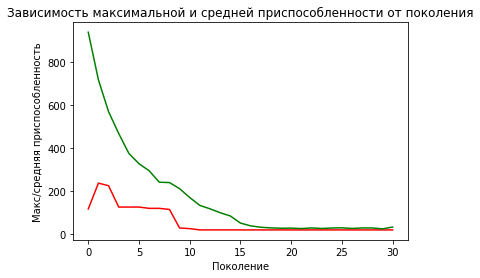

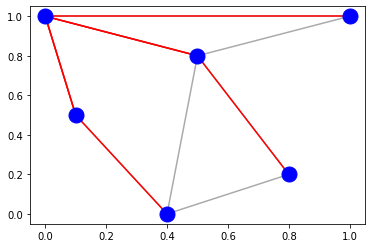

In [ ]:
from deap import base, algorithms
from deap import creator
from deap import tools

#from graph_show import show_graph

import random
import matplotlib.pyplot as plt
import numpy as np

inf = 100
D = ((0, 3, 1, 3, inf, inf),
     (3, 0, 4, inf, inf, inf),
     (1, 4, 0, inf, 7, 5),
     (3, inf, inf, 0, inf, 2),
     (inf, inf, 7, inf, 0, 4),
     (inf, inf, 5, 2, 4, 0))

startV = 0              # стартовая вершина
LENGTH_D = len(D)
LENGTH_CHROM = len(D)*len(D[0])    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 500   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.1        # вероятность мутации индивидуума
MAX_GENERATIONS = 30    # максимальное количество поколений
HALL_OF_FAME_SIZE = 1

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("randomOrder", random.sample, range(LENGTH_D), LENGTH_D)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.randomOrder, LENGTH_D)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)


def dikstryFitness(individual):
    s = 0
    for n, path in enumerate(individual):
        path = path[:path.index(n)+1]

        si = startV
        for j in path:
            s += D[si][j]
            si = j

    return s,         # кортеж

def cxOrdered(ind1, ind2):
    for p1, p2 in zip(ind1, ind2):
        tools.cxOrdered(p1, p2)

    return ind1, ind2

def mutShuffleIndexes(individual, indpb):
    for ind in individual:
        tools.mutShuffleIndexes(ind, indpb)

    return individual,


toolbox.register("evaluate", dikstryFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", cxOrdered)
toolbox.register("mutate", mutShuffleIndexes, indpb=1.0/LENGTH_CHROM/10)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER/LENGTH_D,
                                        mutpb=P_MUTATION/LENGTH_D,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')

fig, ax = plt.subplots()
show_graph(ax, best)
plt.show()